In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,
2010,900000.0,0,0,0.000000,2010
2011,1010000.0,0,0,0.000000,2011
2012,970000.0,0,0,0.000000,2012
2013,1070000.0,0,0,0.000000,2013
2014,1330000.0,0,0,0.000000,2014
2015,1320000.0,0,0,0.000000,2015
2016,1300000.0,0,0,0.000000,2016
2017,1240000.0,0,0,0.000000,2017
2018,1460000.0,0,0,0.000000,2018


Estimated COVID-19 effect: -1237108 ± 85120 (95% confidence)


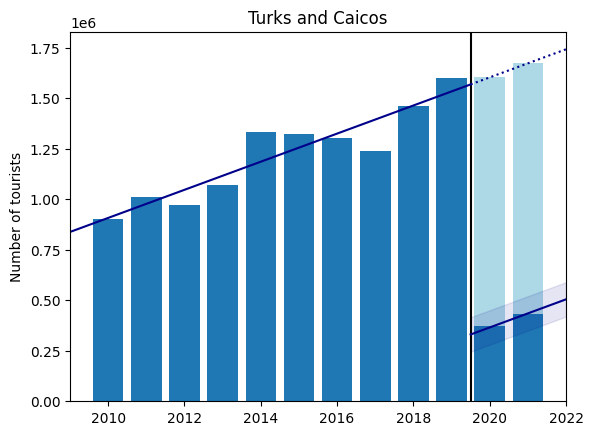

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     146.2
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           2.52e-07
Time:                        16:28:43   Log-Likelihood:                 16.876
No. Observations:                  12   AIC:                            -25.75
Df Residuals:                       8   BIC:                            -23.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -102

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [2]:
# Set up plot
plt.title('Turks and Caicos')
plt.ylabel('Number of tourists')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)